In [14]:
import pickle
import numpy as np
import os

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar10_data(data_dir):
    """ Load all CIFAR-10 data and merge them into training and test datasets """
    train_data = []
    train_labels = []

    # Load all training batches
    for i in range(1, 6):
        data_batch_path = os.path.join(data_dir, f'data_batch_{i}')
        data_batch = unpickle(data_batch_path)
        train_data.append(data_batch[b'data'])
        train_labels += data_batch[b'labels']

    # Load the test batch
    test_batch_path = os.path.join(data_dir, 'test_batch')
    test_batch = unpickle(test_batch_path)
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    # Convert to numpy arrays
    train_data = np.vstack(train_data)
    train_labels = np.array(train_labels)
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)

    return train_data, train_labels, test_data, test_labels

data_dir = 'cifar-10-batches-py'
train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)


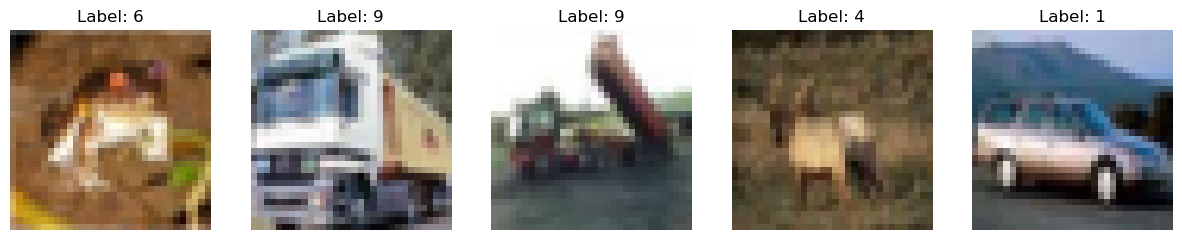

In [15]:
# Function to reshape the flat data into (32, 32, 3)
def reshape_data(data):
    return data.reshape(data.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)

train_data = reshape_data(train_data)
test_data = reshape_data(test_data)

# Function to display images
import matplotlib.pyplot as plt

def show_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')
    plt.show()

show_images(train_data, train_labels)
